In [1]:
import os
import h5py
import numpy as np
import pandas as pd
from data_helpers import grouper
from tempConv import tempConvDecoder
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

Using Theano backend.


In [2]:
## get and format data
# lfp power bands
# lfp_file = h5py.File('datasets/GRat31_636061_lfp_power.hdf5', 'r')
# lfp_data = np.asarray(lfp_file['lfp_power']) # iterate through powerbands

# sorted spike rates
spikes_file = h5py.File('datasets/GRat31_636061_all_sorted_spikes.hdf5', 'r')
# spikes_data = np.asarray(spikes_file['sorted_spikes']).T
spikes_data = np.asarray(spikes_file['sorted_spikes'])

# np.random.shuffle(spikes_data)
# print(spikes_data.shape)

# concatenate all neural data
# neural_data = np.concatenate((spikes_data, lfp_data), axis=0)
# print(neural_data.shape)

# tetrodes = grouper(neural_data, neural_data.shape[0])
# print(tetrodes.shape)

head_signals_h5 = h5py.File('datasets/GRat31_636061_all_head_data.hdf5', 'r')
idx_start, idx_stop = [6,9]
head_signals = np.asarray(
    [np.asarray(head_signals_h5[key]) for key in head_signals_h5.keys()][0:9]
).T[:,idx_start:idx_stop]
print('head_signals shape: ', head_signals.shape)

head_signals_keys = list(head_signals_h5.keys())[0:9][idx_start:idx_stop]
head_signals_int = ['yaw_abs', 'roll_abs', 'pitch_abs']
print('head_signals_keys intuitive: ', head_signals_int)

head_signals shape:  (80690, 3)
head_signals_keys intuitive:  ['yaw_abs', 'roll_abs', 'pitch_abs']


In [ ]:
# tetrode = tetrodes[0].T[:80000,:20]
head_signal = head_signals[:80000,0]
tetrode.shape

In [ ]:
stats = []

Train on 35400 samples, validate on 35400 samples
Epoch 1/25
35400/35400 [==============================] - 6s - loss: 30.7389 - mean_squared_error: 1743.4299 - val_loss: 22.0827 - val_mean_squared_error: 1122.4303

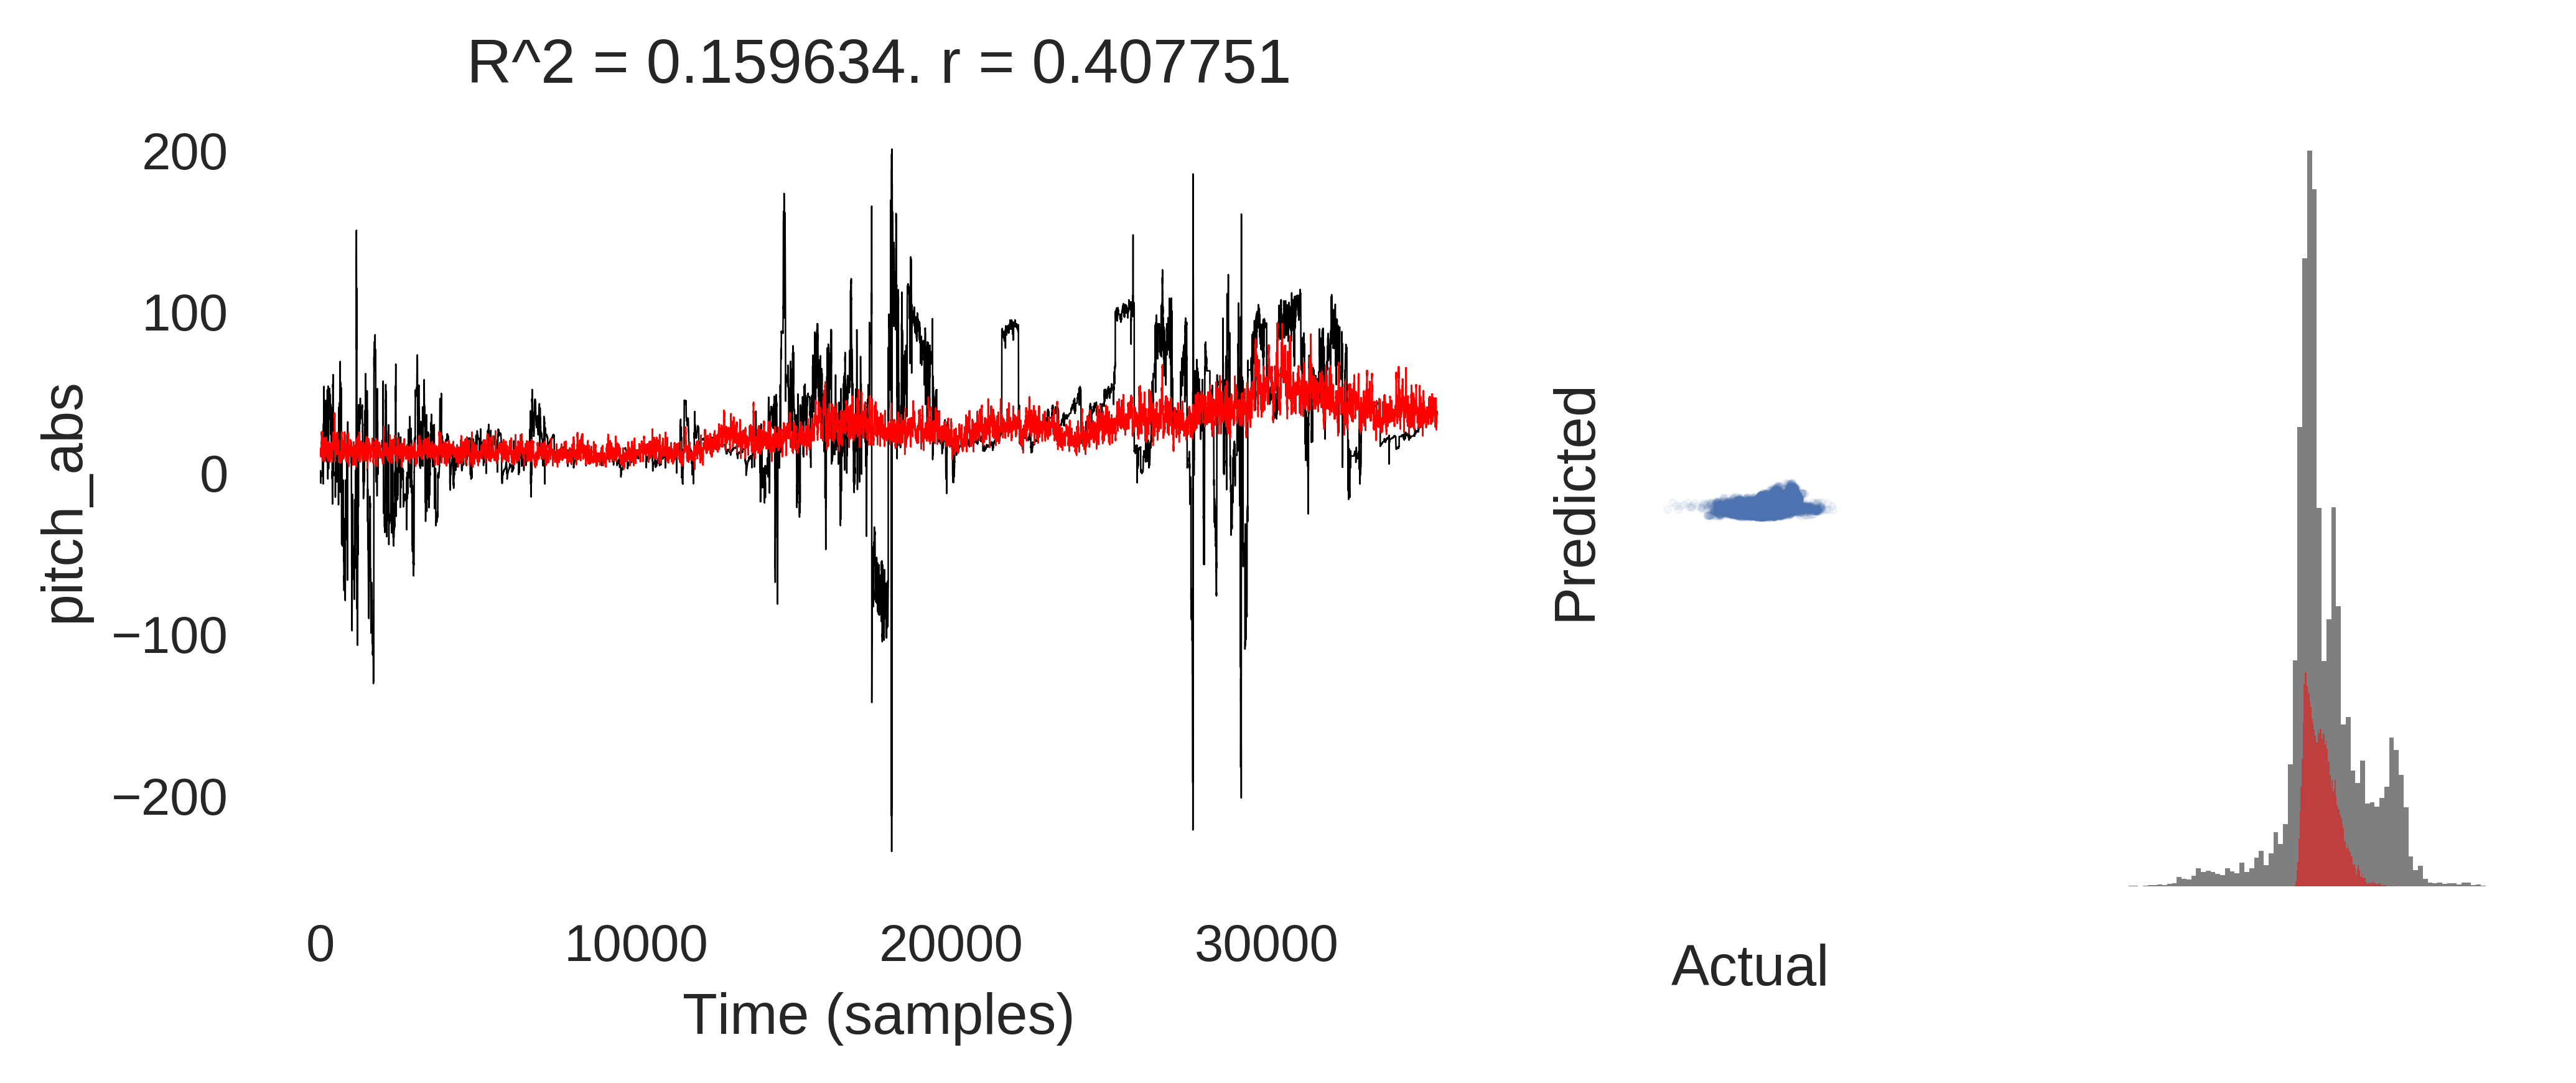

In [3]:
# for i in range(-200,201,20):
TCD = tempConvDecoder(spikes_data,head_signals[:,2],['pitch_abs'],window=30,offset=-4000)
TCD.fit()
R2s,rs = TCD.determine_fit(plot_result=True)
print(R2s,rs)
#     stats.append([i,R2s,rs])

# stats_array = np.asarray(stats)
# np.save('statsfile', stats_array)

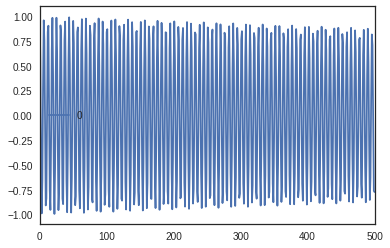

In [24]:
x = np.sin(np.arange(4000))
x = (x-x.mean()) / (x.std())
x_pd = pd.DataFrame(np.correlate(x,x,mode='full')[-x.size:]/x.size)
x_pd.loc[:500].plot()

In [19]:
x.size

4000

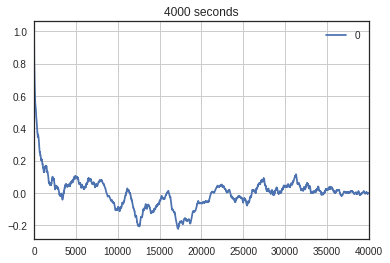

In [14]:
x = head_signals[:40000,0]
x = (x-x.mean()) / (x.std())
x_pd = pd.DataFrame(np.correlate(x,x,mode='full')[-x.size:]/x.size)
x_pd.plot(grid=True, title='4000 seconds')

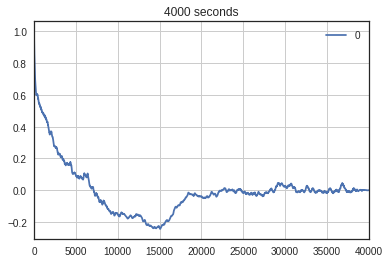

In [16]:
x = head_signals[:40000,1]
x = (x-x.mean()) / (x.std())
x_pd = pd.DataFrame(np.correlate(x,x,mode='full')[-x.size:]/x.size)
x_pd.plot(grid=True, title='4000 seconds')

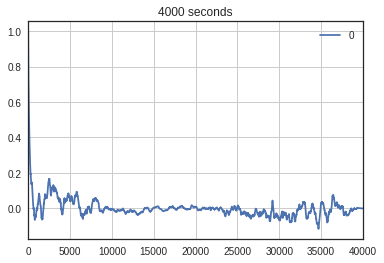

In [18]:
x = head_signals[:40000,2]
x = (x-x.mean()) / (x.std())
x_pd = pd.DataFrame(np.correlate(x,x,mode='full')[-x.size:]/x.size)
x_pd.plot(grid=True, title='4000 seconds')